In [1]:
# MNISt dataSet using Sequential model with 2 FC layers

In [2]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
# set image dimension for Conv layer etc based on tensor flow or theano
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [3]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
# load (downloaded if needed to : C:\Users\sidha\.keras\datasets\mnist.npz) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [6]:
print(X_train.shape) # X_train.shape result is a tuple
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# number of training samples
N1 = X_train.shape[0]  # same as  N1= X_train.shape and then N1 = N1[0]
N2 = X_test.shape[0]  
h = X_train.shape[1]
w = X_train.shape[2]



(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [7]:
# Get the shape of data
print(X_train[0].shape)
print(X_test[0].shape)

(28, 28)
(28, 28)


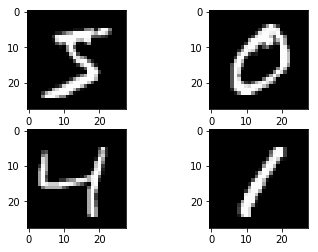

In [8]:
tmp = 220
# plot 4 images as gray scale
#211 is equivalent to nrows=2, ncols=1, plot_number=1. ~ to matlab subplot(2,1)
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()



In [9]:
#Baseline Model with Multi-Layer Perceptrons

#For a multi-layer perceptron model we must reduce the images down into a vector of pixels. 
#In this case the 28×28 sized images will be 784 pixel input values.
num_pixels = h*w
# reshape N1 samples to num_pixels
x_train = X_train.reshape(N1, num_pixels).astype('float32') # shape is now (60000,784)
x_test = X_test.reshape(N2, num_pixels).astype('float32') # shape is now (10000,784)

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
y_test[0]

7

In [12]:
#Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. 10 digits 
# classified to 10 classes
#As such, it is good practice to use a one hot encoding of the class values,
#transforming the vector of class integers into a binary matrix.

#We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.
y_train = np_utils.to_categorical(y_train) #(10000,10): 10000 lables for 10 classes
y_test = np_utils.to_categorical(y_test) # (10000,10): 10000 lables for 10 classes
num_classes = y_test.shape[1]


In [13]:
y_test[0]  # now, digit N is being repesented as [0 0 .. 1 ..0] where 1 is at index N

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [14]:
def baseline_model():
	# create Sequential model : linear stack of layers.
	model = Sequential()
    # Define input layer which with same number of neurons as there are inputs (784), but can have less or more neurons 
    # use RELU for this hidden layer
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    # Define output layer with softmax function, now #neurons must match number of op classes
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
    #  use ADAm optimizer and  Logarithmic loss or  categorical_crossentropy Loss
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# if we need to modify default parameters in optimizer , we do it this way
#      from keras import optimizers
#      adam = optimizers.ADAM(lr=0.001, beta_1=0.9, beta_2=0.999)
#      model.compile(  ,optimizer = adam)

In [15]:
model = baseline_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [16]:
# save the model
model.save("mnist_keras_2FClayers.h5")

In [17]:
# Train the model
# test data is used as validation data
#  A verbose value of 2 is used to reduce the output to one line for each training epoch.
trn=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2810 - acc: 0.9206 - val_loss: 0.1412 - val_acc: 0.9569
Epoch 2/10
 - 2s - loss: 0.1115 - acc: 0.9677 - val_loss: 0.0912 - val_acc: 0.9717
Epoch 3/10
 - 2s - loss: 0.0716 - acc: 0.9799 - val_loss: 0.0775 - val_acc: 0.9778
Epoch 4/10
 - 2s - loss: 0.0502 - acc: 0.9859 - val_loss: 0.0740 - val_acc: 0.9772
Epoch 5/10
 - 2s - loss: 0.0372 - acc: 0.9890 - val_loss: 0.0672 - val_acc: 0.9797
Epoch 6/10
 - 2s - loss: 0.0267 - acc: 0.9928 - val_loss: 0.0622 - val_acc: 0.9804
Epoch 7/10
 - 2s - loss: 0.0206 - acc: 0.9948 - val_loss: 0.0633 - val_acc: 0.9801
Epoch 8/10
 - 2s - loss: 0.0141 - acc: 0.9970 - val_loss: 0.0610 - val_acc: 0.9811
Epoch 9/10
 - 2s - loss: 0.0106 - acc: 0.9980 - val_loss: 0.0574 - val_acc: 0.9822
Epoch 10/10
 - 2s - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0579 - val_acc: 0.9818


In [18]:
# Final evaluation of the model on test data
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
# Note: as test set is same as validation, validation accuracy matched the test accuracy here

Baseline Accuracy: 98.18%
Baseline Error: 1.82%


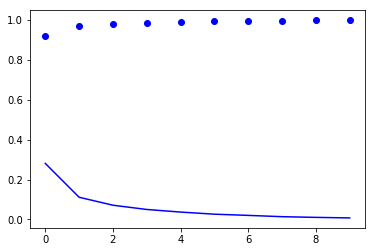

In [19]:
#plot training accuracy and loss
trn_acc = trn.history['acc']
trn_loss = trn.history['loss']
epochs = range(len(trn_acc))
plt.plot(epochs,trn_acc,'bo',label = 'Train accuracy')
plt.plot(epochs,trn_loss,'b',label = 'Train Loss')

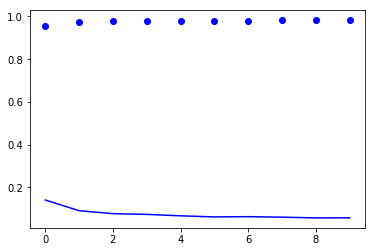

In [20]:
# plot validation accuracy and loss
val_acc = trn.history['val_acc']
val_loss = trn.history['val_loss']
epochs = range(len(trn_acc))
plt.plot(epochs,val_acc,'bo',label = 'Train accuracy')
plt.plot(epochs,val_loss,'b',label = 'Train Loss')



In [21]:
#Get classification report
y_p = model.predict_classes(x_test)
y_p = np_utils.to_categorical(y_p)
from sklearn.metrics import classification_report
target_nms = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test,y_p,target_names=target_nms))

ModuleNotFoundError: No module named 'sklearn'